## Declaração do problema
<p>A empresa automobilística chinesa Geely Auto aspira entrar no mercado dos EUA estabelecendo lá a sua unidade de produção e produzindo carros localmente para dar concorrência aos seus homólogos dos EUA e da Europa.</p>

<p>Eles contrataram uma empresa de consultoria automotiva para <strong>entender os fatores dos quais depende o preço dos carros</strong>. Especificamente, pretendem compreender os factores que afectam os preços dos automóveis no mercado americano, uma vez que estes podem ser muito diferentes dos do mercado chinês. A empresa quer saber:</p>

<ul>
    <li><strong>Quais variáveis ​​são significativas na previsão do preço de um carro?</strong></li>
    <li><strong>Quão bem essas variáveis ​​descrevem o preço de um carro?</strong></li>
</ul>
<strong>Observação: o conjunto de dados fornecido é para fins de aprendizagem. Por favor, não faça nenhuma inferência com o cenário do mundo real.</strong>

In [1]:
import pandas as pd #importando o pandas

base = pd.read_csv('preco_carro.csv')

In [2]:
#passando as colunas, mas em português
colunas_pt = ['car_ID', 'simbolizando', 'Nome do Carro', 'tipo de combustível', 'aspiração', 'número da porta', 
           'carroceria', 'volante', 'localização do motor', 'distância entre eixos', 'comprimento do carro',
           'largura do carro', 'altura do carro', 'peso bruto', 'tipo de motor', 'número do cilindro', 'tamanho do motor',
           'Sistema de combustível', 'boreração', 'AVC', 'taxa de compressão', 'cavalos de potência', 'rpm de pico',
           'cidadempg', 'rodovia mpg', 'preço'
]

base.columns = colunas_pt

In [3]:
base.head(1) #Visualizando a base

,car_ID,simbolizando,Nome do Carro,tipo de combustível,aspiração,número da porta,carroceria,volante,localização do motor,distância entre eixos,...,tamanho do motor,Sistema de combustível,boreração,AVC,taxa de compressão,cavalos de potência,rpm de pico,cidadempg,rodovia mpg,preço
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0


In [4]:
base.info() #informações da base

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   car_ID                  205 non-null    int64  
 1   simbolizando            205 non-null    int64  
 2   Nome do Carro           205 non-null    object 
 3   tipo de combustível     205 non-null    object 
 4   aspiração               205 non-null    object 
 5   número da porta         205 non-null    object 
 6   carroceria              205 non-null    object 
 7   volante                 205 non-null    object 
 8   localização do motor    205 non-null    object 
 9   distância entre eixos   205 non-null    float64
 10  comprimento do carro    205 non-null    float64
 11  largura do carro        205 non-null    float64
 12  altura do carro         205 non-null    float64
 13  peso bruto              205 non-null    int64  
 14  tipo de motor           205 non-null    ob

In [5]:
base.describe() # descrição da base

,car_ID,simbolizando,distância entre eixos,comprimento do carro,largura do carro,altura do carro,peso bruto,tamanho do motor,boreração,AVC,taxa de compressão,cavalos de potência,rpm de pico,cidadempg,rodovia mpg,preço
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [6]:
base.nunique() #Verificando a quantidade de valores diferentes em cada coluna

car_ID                    205
simbolizando                6
Nome do Carro             147
tipo de combustível         2
aspiração                   2
número da porta             2
carroceria                  5
volante                     3
localização do motor        2
distância entre eixos      53
comprimento do carro       75
largura do carro           44
altura do carro            49
peso bruto                171
tipo de motor               7
número do cilindro          7
tamanho do motor           44
Sistema de combustível      8
boreração                  38
AVC                        37
taxa de compressão         32
cavalos de potência        59
rpm de pico                23
cidadempg                  29
rodovia mpg                30
preço                     189
dtype: int64

In [7]:
base.duplicated().sum() #Verificando se possui valores duplicados

0

C:\Users\Edileusa\AppData\Local\Temp\ipykernel_9720\96496907.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(base.corr(), annot=True, fmt='.0f');


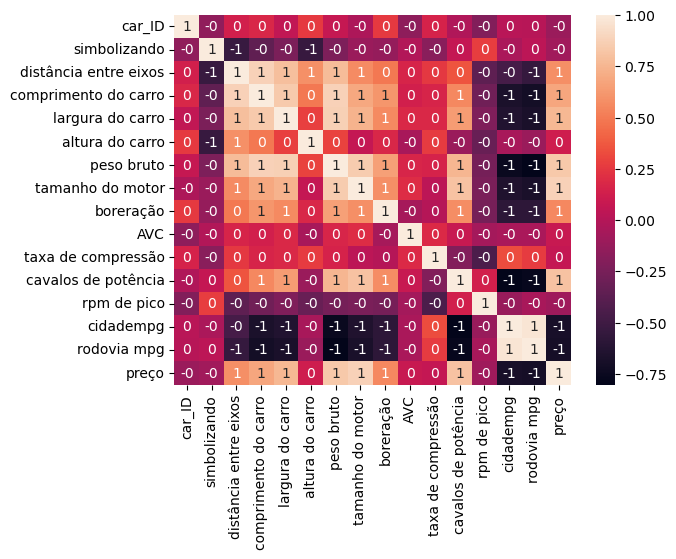

In [8]:
import seaborn as sns
sns.heatmap(base.corr(), annot=True, fmt='.0f'); 
#Criando um gráfico de correlação

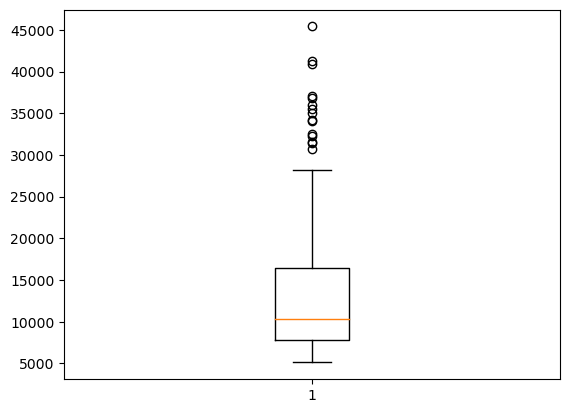

In [9]:
#Verificando se a coluna preços tem outliers, vou deixar ela com os outliers por enquanto
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

ax.boxplot(base['preço'])

plt.show()

### Dividindo em treino e teste e criando uma regressão linear simples 

In [10]:
#Nessa regressão linear simples, utilizei apenas a coluna de tamanho de motor que mostra ter uma ...
#alta correlação com a coluna de preço
from sklearn.model_selection import train_test_split

X = base['tamanho do motor']
y = base['preço']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=42)

In [11]:
from sklearn.linear_model import LinearRegression
#Criando o modelo e passando os valores de treino para treinar o mesmo
#O values reshape(-1,1) serve para transformar um array unidimensional ... 
#em uma matriz bidimensional(Que é o que o scikit-learn espera trabalhar) com uma coluna.
regL1 = LinearRegression().fit(X_train.values.reshape(-1,1), y_train)
#Avaliando o modelo usando o score
print(regL1.score(X_train.values.reshape(-1,1), y_train))
print(regL1.score(X_test.values.reshape(-1,1), y_test))

0.7650159366830335
0.7606548315153333


In [12]:
#Criando o predict para valores de treino e teste
y_pred_test_RL1 = regL1.predict(X_test.values.reshape(-1,1))
y_pred_train_RL1 = regL1.predict(X_train.values.reshape(-1,1))

In [13]:
from sklearn.metrics import mean_absolute_error
import numpy as np
#Avaliando o erro médio absoluto dos dois conjuntos de dados
#Usando o log + 1 apenas para deixar os resultados mais fáceis de se visualizar
#Ele mede a média absoluta das diferenças entre as previsões do modelo e os valores reais
print(f'MAE: {mean_absolute_error(y_test, y_pred_test_RL1):.5f}, Log(MAE + 1): {np.log1p(mean_absolute_error(y_test, y_pred_test_RL1)):.5f}')
print(f'MAE: {mean_absolute_error(y_train, y_pred_train_RL1):.5f}, Log(MAE + 1): {np.log1p(mean_absolute_error(y_train, y_pred_train_RL1)):.5f}')

MAE: 2773.99082, Log(MAE + 1): 7.92840
MAE: 2906.38301, Log(MAE + 1): 7.97501


In [14]:
#Importando o erro médio quadrático para avaliar o modelo
#Ao contrário do Mean Absolute Error (MAE), o MSE penaliza mais fortemente grandes erros, ...
#já que ele envolve o quadrado das diferenças entre as previsões do modelo e os valores reais
from sklearn.metrics import mean_squared_error
print(f'MSE: {mean_squared_error(y_test, y_pred_test_RL1):.5F}, Log(MSE + 1): {np.log1p(mean_squared_error(y_test, y_pred_test_RL1)):.5F}')
print(f'MSE: {mean_squared_error(y_train, y_pred_train_RL1):.5F}, Log(MSE + 1): {np.log1p(mean_squared_error(y_train, y_pred_train_RL1)):.5F}')

MSE: 15661604.54845, Log(MSE + 1): 16.56672
MSE: 14675971.64577, Log(MSE + 1): 16.50172


In [15]:
#Importnado o R2 score
#métrica que avalia a proporção da variabilidade na variável dependente que é explicada pelo modelo. 
#Essa métrica fornece uma indicação do quão bem as previsões do modelo se ajustam aos dados reais.
from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred_test_RL1))
print(r2_score(y_train, y_pred_train_RL1))

0.7606548315153333
0.7650159366830335


In [16]:
#Importando o numpy e juntando os valores previstos em treino e teste
import numpy as np
y_pred_RL1 = np.concatenate((y_pred_train_RL1, y_pred_test_RL1))

In [17]:
#Criando a conta da equação da reta para plotar a reta no gráfico
a = regL1.coef_[0]
b = regL1.intercept_
y_reta = a*X+b

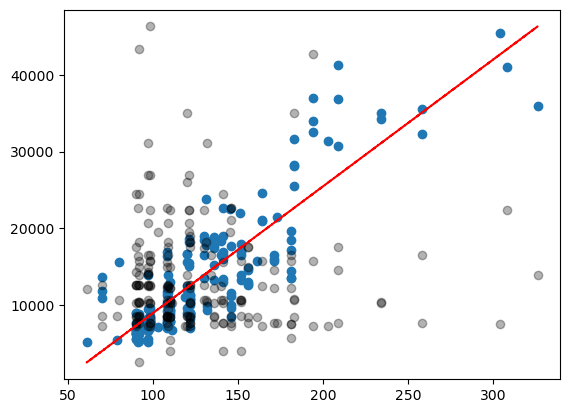

In [18]:
fig, ax = plt.subplots()

ax.scatter(X,y)
ax.scatter(X, y_pred_RL1, c='k', alpha=0.3)
ax.plot(X, y_reta, '--r')

plt.show()

#### Regressão Linear Múltipla - Colunas com **Alta Correlação com a Coluna Preço** 

In [19]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   car_ID                  205 non-null    int64  
 1   simbolizando            205 non-null    int64  
 2   Nome do Carro           205 non-null    object 
 3   tipo de combustível     205 non-null    object 
 4   aspiração               205 non-null    object 
 5   número da porta         205 non-null    object 
 6   carroceria              205 non-null    object 
 7   volante                 205 non-null    object 
 8   localização do motor    205 non-null    object 
 9   distância entre eixos   205 non-null    float64
 10  comprimento do carro    205 non-null    float64
 11  largura do carro        205 non-null    float64
 12  altura do carro         205 non-null    float64
 13  peso bruto              205 non-null    int64  
 14  tipo de motor           205 non-null    ob

In [20]:
#Passando agora as colunas com alta correlação com a coluna de preço na variável X2
X2 = base[['tamanho do motor','cavalos de potência', 'peso bruto', 'largura do carro', 'comprimento do carro']]
y2 = base['preço']

X_train, X_test, y_train, y_test = train_test_split(X2,y2, test_size=0.33, random_state=42)

In [21]:
#Em comparação com a regressão simples, essa teve um resultado bom
regL2 = LinearRegression().fit(X_train, y_train)
print(regL2.score(X_train, y_train))
print(regL2.score(X_test, y_test))

0.8417047427051035
0.7735508480763209


In [22]:
y_pred_test_RL2 = regL2.predict(X_test)
y_pred_train_RL2 = regL2.predict(X_train)

In [23]:
print(f'MAE: {mean_absolute_error(y_test, y_pred_test_RL2):.5f}, Log(MAE + 1): {np.log1p(mean_absolute_error(y_test, y_pred_test_RL2)):.5f}')
print(f'MAE: {mean_absolute_error(y_train, y_pred_train_RL2):.5f}, Log(MAE + 1): {np.log1p(mean_absolute_error(y_train, y_pred_train_RL2)):.5f}')

MAE: 2659.73800, Log(MAE + 1): 7.88636
MAE: 2276.79633, Log(MAE + 1): 7.73096


In [24]:
print(f'MSE: {mean_squared_error(y_test, y_pred_test_RL2):.5F}, Log(MSE + 1): {np.log1p(mean_squared_error(y_test, y_pred_test_RL2)):.5F}')
print(f'MSE: {mean_squared_error(y_train, y_pred_train_RL2):.5F}, Log(MSE + 1): {np.log1p(mean_squared_error(y_train, y_pred_train_RL2)):.5F}')

MSE: 14817750.82494, Log(MSE + 1): 16.51134
MSE: 9886358.56801, Log(MSE + 1): 16.10667


In [25]:
print(r2_score(y_test, y_pred_test_RL2))
print(r2_score(y_train, y_pred_train_RL2))

0.7735508480763209
0.8417047427051035


In [26]:
y_pred_RL2 = np.concatenate((y_pred_train_RL2, y_pred_test_RL2))

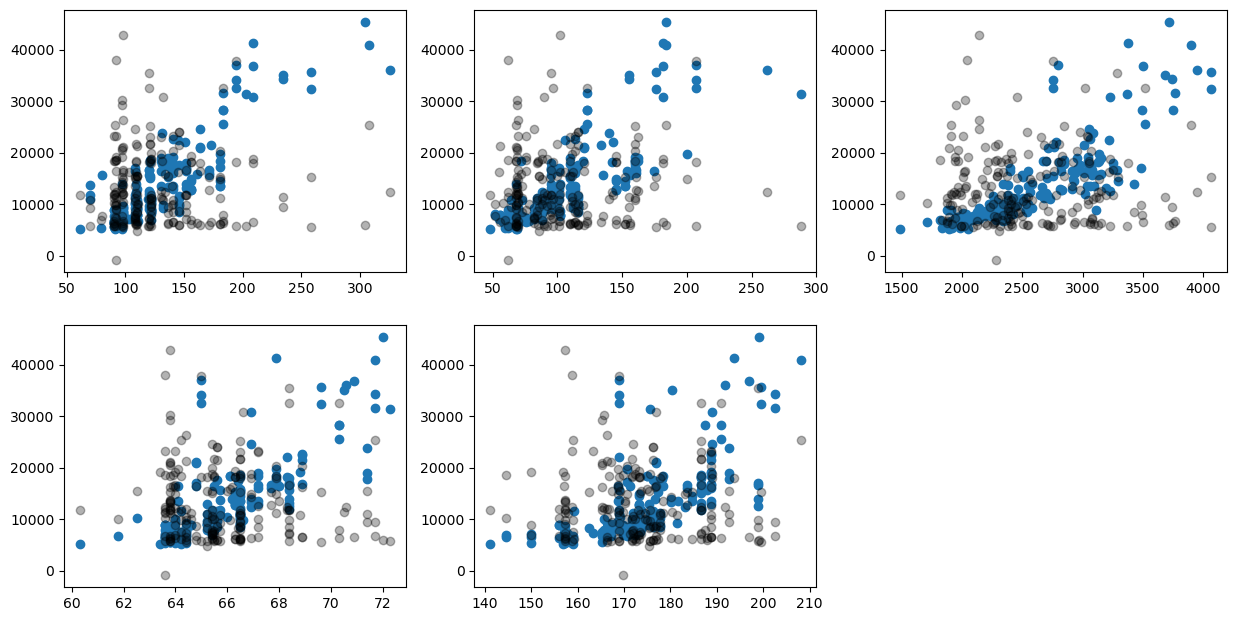

In [27]:
#Criando o gráfico para cada coluna de X2 com preço e os dados previstos em treino e teste
fig, ax = plt.subplots(nrows=2,ncols=3, figsize=(15,7.5))

ax[0][0].scatter(base['tamanho do motor'],base['preço'])
ax[0][0].scatter(base['tamanho do motor'], y_pred_RL2, c='k', alpha=0.3)

ax[0][1].scatter(base['cavalos de potência'],base['preço'])
ax[0][1].scatter(base['cavalos de potência'], y_pred_RL2, c='k', alpha=0.3)

ax[0][2].scatter(base['peso bruto'],base['preço'])
ax[0][2].scatter(base['peso bruto'], y_pred_RL2, c='k', alpha=0.3)

ax[1][0].scatter(base['largura do carro'],base['preço'])
ax[1][0].scatter(base['largura do carro'], y_pred_RL2, c='k', alpha=0.3)

ax[1][1].scatter(base['comprimento do carro'],base['preço'])
ax[1][1].scatter(base['comprimento do carro'], y_pred_RL2, c='k', alpha=0.3)

fig.delaxes(ax[1, 2])

plt.show()

#### Regressão linear múltipla **sem outliers** - Colunas com **alta correlação com a coluns Preço**

In [28]:
#Criando a base2 sem os outliers(valores muito altos comparado a média) da coluna preço
base2 = base[base['preço'] < 28000]

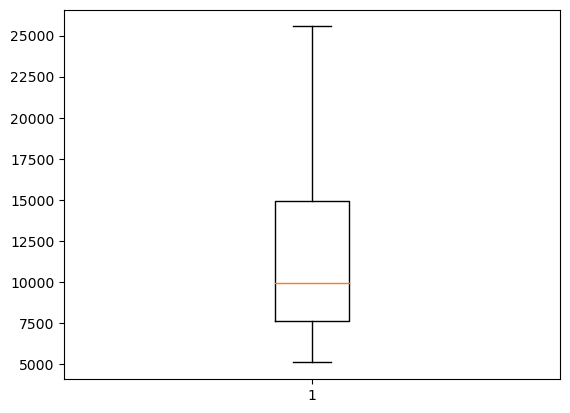

In [29]:
#Gráfico para verificar se a base2 realmente não possui outliers
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

ax.boxplot(base2['preço'])

plt.show()

In [30]:
#Mesmas coluna do modelo2, mas passando com a coluna de preço sem os outliers
X3 = base2[['tamanho do motor', 'cavalos de potência','peso bruto', 'comprimento do carro', 'largura do carro']]
y3 = base2['preço']

X_train, X_test, y_train, y_test = train_test_split(X3,y3, test_size=0.33, random_state=42)

In [31]:
#O resultado piorou em relação com outliers
regL3 = LinearRegression().fit(X_train, y_train)
print(regL3.score(X_train, y_train))
print(regL3.score(X_test, y_test))

0.7835594256550297
0.684793559238255


In [32]:
y_pred_test_RL3 = regL3.predict(X_test)
y_pred_train_RL3 = regL3.predict(X_train)

In [33]:
print(f'MAE: {mean_absolute_error(y_test, y_pred_test_RL3):.5f}, Log(MAE + 1): {np.log1p(mean_absolute_error(y_test, y_pred_test_RL3)):.5f}')
print(f'MAE: {mean_absolute_error(y_train, y_pred_train_RL3):.5f}, Log(MAE + 1): {np.log1p(mean_absolute_error(y_train, y_pred_train_RL3)):.5f}')

MAE: 1691.51936, Log(MAE + 1): 7.43397
MAE: 1638.61871, Log(MAE + 1): 7.40222


In [34]:
print(f'MSE: {mean_squared_error(y_test, y_pred_test_RL3):.5F}, Log(MSE + 1): {np.log1p(mean_squared_error(y_test, y_pred_test_RL3)):.5F}')
print(f'MSE: {mean_squared_error(y_train, y_pred_train_RL3):.5F}, Log(MSE + 1): {np.log1p(mean_squared_error(y_train, y_pred_train_RL3)):.5F}')

MSE: 5314080.67765, Log(MSE + 1): 15.48587
MSE: 5260685.38104, Log(MSE + 1): 15.47577


In [35]:
print(r2_score(y_test, y_pred_test_RL3))
print(r2_score(y_train, y_pred_train_RL3))

0.684793559238255
0.7835594256550297


In [36]:
y_pred_RL3 = np.concatenate((y_pred_train_RL3, y_pred_test_RL3))

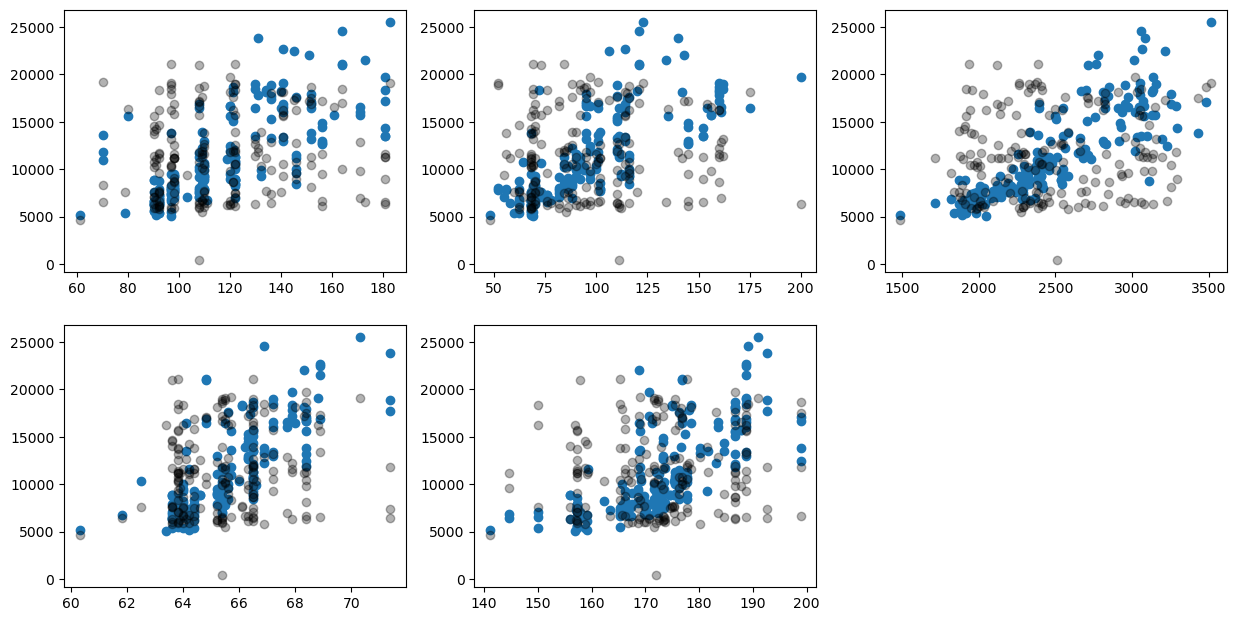

In [37]:
fig, ax = plt.subplots(nrows=2,ncols=3, figsize=(15,7.5))

ax[0][0].scatter(base2['tamanho do motor'],base2['preço'])
ax[0][0].scatter(base2['tamanho do motor'], y_pred_RL3, c='k', alpha=0.3)

ax[0][1].scatter(base2['cavalos de potência'],base2['preço'])
ax[0][1].scatter(base2['cavalos de potência'], y_pred_RL3, c='k', alpha=0.3)

ax[0][2].scatter(base2['peso bruto'],base2['preço'])
ax[0][2].scatter(base2['peso bruto'], y_pred_RL3, c='k', alpha=0.3)

ax[1][0].scatter(base2['largura do carro'],base2['preço'])
ax[1][0].scatter(base2['largura do carro'], y_pred_RL3, c='k', alpha=0.3)

ax[1][1].scatter(base2['comprimento do carro'],base2['preço'])
ax[1][1].scatter(base2['comprimento do carro'], y_pred_RL3, c='k', alpha=0.3)

fig.delaxes(ax[1, 2])

plt.show()

#### Fazendo a regressão linear simples para **todas as colunas**

In [38]:
base.select_dtypes(include=['int64']).head(1) #Selecionando colunas pelo tipo de dados

,car_ID,simbolizando,peso bruto,tamanho do motor,cavalos de potência,rpm de pico,cidadempg,rodovia mpg
0,1,3,2548,130,111,5000,21,27


In [39]:
base.select_dtypes(include=['float64']).head(1) #Selecionando colunas pelo tipo de dados

,distância entre eixos,comprimento do carro,largura do carro,altura do carro,boreração,AVC,taxa de compressão,preço
0,88.6,168.8,64.1,48.8,3.47,2.68,9.0,13495.0


In [40]:
#Pegando todas as colunas numéricas para fazer o modelo4
X4 = base[['simbolizando', 'distância entre eixos', 'comprimento do carro', 'largura do carro', 'altura do carro', 'peso bruto', 'tamanho do motor', 'boreração', 'AVC', 'cavalos de potência', 'rpm de pico', 'cidadempg', 'rodovia mpg', 'taxa de compressão']]
y4 = base['preço']

X_train, X_test, y_train, y_test = train_test_split(X4,y4, test_size=0.33, random_state=42)

In [41]:
lista = X4.columns #pegando todas as coluna de X4
#Criando um laço para fazer um modelo de cada coluna numérica com preço
for i in lista :
    print(i)
    regL = LinearRegression().fit(X_train[i].values.reshape(-1,1), y_train)
    print(regL.score(X_train[i].values.reshape(-1,1), y_train)*100)#Avaliando todos os modelos para treino e teste
    print(regL.score(X_test[i].values.reshape(-1,1), y_test)*100)
#As colunas que tiveram os scores mais altos foram as de peso bruto com tamanho do motor

simbolizando
0.19651764390961057
0.6433563765055883
distância entre eixos
30.257753042523593
38.779420625614605
comprimento do carro
45.54235739672588
48.35939693085155
largura do carro
60.50780055530767
51.989051630451314
altura do carro
0.29013253448715304
1.836675740733873
peso bruto
70.4010470425599
68.34694535106757
tamanho do motor
76.50159366830334
76.06548315153333
boreração
29.199661859756198
32.642719903218286
AVC
0.2611995103228182
0.6439049533585539
cavalos de potência
66.33606030004849
63.08458575329794
rpm de pico
0.7678443403454471
0.08401320466689954
cidadempg
53.788406679166
29.696688038475806
rodovia mpg
55.85916374510143
30.506656777090146
taxa de compressão
0.1466087630590307
0.37013685647012684


In [42]:
#Fazendo a mesma coisa, mas mudando a avaliação para os erros absolutos e quadráticos
lista = X4.columns

for i in lista :
    print(i)
    regL = LinearRegression().fit(X_train[i].values.reshape(-1,1), y_train)
    y_pred_test_RL = regL.predict(X_test[i].values.reshape(-1,1))
    print(f'MAE: {mean_absolute_error(y_test, y_pred_test_RL):.5f}, Log(MAE + 1): {np.log1p(mean_absolute_error(y_test, y_pred_test_RL)):.5f}')
    print(f'MSE: {mean_squared_error(y_test, y_pred_test_RL):.5F}, Log(MSE + 1): {np.log1p(mean_squared_error(y_test, y_pred_test_RL)):.5F}')
    print('-----------------------')

simbolizando
MAE: 6011.93223, Log(MAE + 1): 8.70167
MSE: 65014241.63037, Log(MSE + 1): 17.99012
-----------------------
distância entre eixos
MAE: 4121.66936, Log(MAE + 1): 8.32426
MSE: 40059822.82655, Log(MSE + 1): 17.50588
-----------------------
comprimento do carro
MAE: 3937.60803, Log(MAE + 1): 8.27858
MSE: 33791143.93797, Log(MSE + 1): 17.33571
-----------------------
largura do carro
MAE: 3173.01894, Log(MAE + 1): 8.06275
MSE: 31416071.27984, Log(MSE + 1): 17.26283
-----------------------
altura do carro
MAE: 5934.55841, Log(MAE + 1): 8.68872
MSE: 64233390.43956, Log(MSE + 1): 17.97803
-----------------------
peso bruto
MAE: 2886.10458, Log(MAE + 1): 7.96801
MSE: 20712246.99461, Log(MSE + 1): 16.84624
-----------------------
tamanho do motor
MAE: 2773.99082, Log(MAE + 1): 7.92840
MSE: 15661604.54845, Log(MSE + 1): 16.56672
-----------------------
boreração
MAE: 4862.68758, Log(MAE + 1): 8.48955
MSE: 44075386.64824, Log(MSE + 1): 17.60141
-----------------------
AVC
MAE: 5978.453

#### Fazendo a regressão linear Múltipla para **todos os pares das colunas**

In [43]:
X5 = base[['simbolizando', 'distância entre eixos', 'comprimento do carro', 'largura do carro', 'altura do carro', 'peso bruto', 'tamanho do motor', 'boreração', 'AVC', 'cavalos de potência', 'rpm de pico', 'cidadempg', 'rodovia mpg', 'taxa de compressão']]
y5 = base['preço']

X_train, X_test, y_train, y_test = train_test_split(X5,y5, test_size=0.33, random_state=42)

In [44]:
#Fazendo modelos para os pares de todas colunas numéricas da base e a coluna de preço
lista = X_train.columns

for i in range(0, len(lista)):
    for j in range(i+1, len(lista)):
        print(lista[i], lista[j])
        X5_train = X_train[[lista[i], lista[j]]]
        X5_test = X_test[[lista[i], lista[j]]]
        
        regL_multi = LinearRegression().fit(X5_train, y_train)
        y_pred_test_RLmulti = regL_multi.predict(X5_test)
        
        print(regL_multi.score(X5_train, y_train)*100)#Avaliando todos os modelos para treino e teste
        print(regL_multi.score(X5_test, y_test)*100)
        print('-------------------------')
#Mais uma vez a coluna de peso bruto e tamanho do motor de destacam

simbolizando distância entre eixos
38.58608157521394
43.602109143306
-------------------------
simbolizando comprimento do carro
49.75863910635988
48.80703516468551
-------------------------
simbolizando largura do carro
61.95284979217479
51.92814704224964
-------------------------
simbolizando altura do carro
0.33048556211586755
1.89773587612444
-------------------------
simbolizando peso bruto
72.60525208235677
67.39698173352714
-------------------------
simbolizando tamanho do motor
76.60821596369247
75.79268941164051
-------------------------
simbolizando boreração
29.22690107364856
32.43967404048222
-------------------------
simbolizando AVC
0.4242550248183097
1.6630200982484022
-------------------------
simbolizando cavalos de potência
67.15865632668677
66.40401141154736
-------------------------
simbolizando rpm de pico
0.8324867546192549
0.6311981612461603
-------------------------
simbolizando cidadempg
54.510902823274265
31.308896043452737
-------------------------
simbolizan

In [45]:
#Fazendo a mesma coisa, mas mudando a avaliação para os erros absolutos e quadráticos
lista = X_train.columns

for i in range(0, len(lista)):
    for j in range(i+1, len(lista)):
        print(lista[i], lista[j])
        X5_train = X_train[[lista[i], lista[j]]]
        X5_test = X_test[[lista[i], lista[j]]]
        
        regL_multi = LinearRegression().fit(X5_train, y_train)
        y_pred_test_RLmulti = regL_multi.predict(X5_test)
        
        print(f'MAE: {mean_absolute_error(y_test, y_pred_test_RLmulti):.5f}, Log(MAE + 1): {np.log1p(mean_absolute_error(y_test, y_pred_test_RLmulti)):.5f}')
        print(f'MSE: {mean_squared_error(y_test, y_pred_test_RLmulti):.5F}, Log(MSE + 1): {np.log1p(mean_squared_error(y_test, y_pred_test_RLmulti)):.5F}')
        print('-------------------------')


simbolizando distância entre eixos
MAE: 3719.08974, Log(MAE + 1): 8.22150
MSE: 36904085.82535, Log(MSE + 1): 17.42383
-------------------------
simbolizando comprimento do carro
MAE: 3924.01958, Log(MAE + 1): 8.27513
MSE: 33498230.86003, Log(MSE + 1): 17.32700
-------------------------
simbolizando largura do carro
MAE: 3274.72702, Log(MAE + 1): 8.09430
MSE: 31455924.33313, Log(MSE + 1): 17.26410
-------------------------
simbolizando altura do carro
MAE: 5955.77125, Log(MAE + 1): 8.69228
MSE: 64193435.60361, Log(MSE + 1): 17.97741
-------------------------
simbolizando peso bruto
MAE: 3034.46897, Log(MAE + 1): 8.01812
MSE: 21333857.80913, Log(MSE + 1): 16.87581
-------------------------
simbolizando tamanho do motor
MAE: 2804.87457, Log(MAE + 1): 7.93947
MSE: 15840107.74133, Log(MSE + 1): 16.57806
-------------------------
simbolizando boreração
MAE: 4870.99317, Log(MAE + 1): 8.49126
MSE: 44208250.16194, Log(MSE + 1): 17.60442
-------------------------
simbolizando AVC
MAE: 5974.73014

##### Fazendo o **Feature Engineering** na base

In [46]:
base.info() #Pegando as informações da base

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   car_ID                  205 non-null    int64  
 1   simbolizando            205 non-null    int64  
 2   Nome do Carro           205 non-null    object 
 3   tipo de combustível     205 non-null    object 
 4   aspiração               205 non-null    object 
 5   número da porta         205 non-null    object 
 6   carroceria              205 non-null    object 
 7   volante                 205 non-null    object 
 8   localização do motor    205 non-null    object 
 9   distância entre eixos   205 non-null    float64
 10  comprimento do carro    205 non-null    float64
 11  largura do carro        205 non-null    float64
 12  altura do carro         205 non-null    float64
 13  peso bruto              205 non-null    int64  
 14  tipo de motor           205 non-null    ob

In [47]:
base3 = base.drop(['car_ID', 'Nome do Carro'], axis=1) #Criando a base 3 para a feature engineering e apagando colunas que não irei usar

In [48]:
#Observando apenas as coluna de numeros inteiros e olhando a descrição delas
#Quando possuimos colunas com o desvio padrão(std) alto e os valores de minimo e maximo estão muito longe um do outro
#Esses valores com alta diferença entre um e outro pode afetar o modelo que pode dá mais importância para valores altos
#Podemos tornar esses valores mais escaláveis para o modelo
base3.select_dtypes(include=['int64']).describe()

,simbolizando,peso bruto,tamanho do motor,cavalos de potência,rpm de pico,cidadempg,rodovia mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,2555.565854,126.907317,104.117073,5125.121951,25.219512,30.751220
std,1.245307,520.680204,41.642693,39.544167,476.985643,6.542142,6.886443
min,-2.000000,1488.000000,61.000000,48.000000,4150.000000,13.000000,16.000000
25%,0.000000,2145.000000,97.000000,70.000000,4800.000000,19.000000,25.000000
50%,1.000000,2414.000000,120.000000,95.000000,5200.000000,24.000000,30.000000
75%,2.000000,2935.000000,141.000000,116.000000,5500.000000,30.000000,34.000000
max,3.000000,4066.000000,326.000000,288.000000,6600.000000,49.000000,54.000000


In [49]:
#Para tornar esses valores mais escaláveis, vamos utilizar a padronização dos dados, usando a biblioteca StandardScaler
#Padronizar (ou escala padrão) é quando passamos o desvio padrão para 1
from sklearn.preprocessing import StandardScaler #importando

scaler_pesobruto = StandardScaler() #Criando o objeto
scaler_pesobruto = scaler_pesobruto.fit(base3[['peso bruto']]) #Escolhendo a coluna que irá passar pela normalização

base3['peso bruto_padrao'] = scaler_pesobruto.transform(base3[['peso bruto']]) #criando uma nova coluna com os dados normalizados
base3 = base3.drop('peso bruto', axis=1) #apagando a coluna antiga
#Esse processo se repete para todas outras colunas(seja de valores inteiros ou decimais) que possuam valores desproporcionais

In [50]:
scaler_tamanhoMotor = StandardScaler()
scaler_tamanhoMotor = scaler_tamanhoMotor.fit(base3[['tamanho do motor']])

base3['tamanho do motor_padrao'] = scaler_tamanhoMotor.transform(base3[['tamanho do motor']])
base3 = base3.drop('tamanho do motor', axis=1)

In [51]:
scaler_cavalosPotencia = StandardScaler()
scaler_cavalosPotencia = scaler_cavalosPotencia.fit(base3[['cavalos de potência']])

base3['cavalos de potência_padrao'] = scaler_cavalosPotencia.transform(base3[['cavalos de potência']])
base3 = base3.drop('cavalos de potência', axis=1)

In [52]:
scaler_rpmPico = StandardScaler()
scaler_rpmPico = scaler_rpmPico.fit(base3[['rpm de pico']])

base3['rpm de pico_padrao'] = scaler_rpmPico.transform(base3[['rpm de pico']])
base3 = base3.drop('rpm de pico', axis=1)

In [53]:
scaler_cidadempg = StandardScaler()
scaler_cidadempg = scaler_cidadempg.fit(base3[['cidadempg']])

base3['cidadempg_padrao'] = scaler_cidadempg.transform(base3[['cidadempg']])
base3 = base3.drop('cidadempg', axis=1)

In [54]:
scaler_rodoviampg = StandardScaler()
scaler_rodoviampg = scaler_rodoviampg.fit(base3[['rodovia mpg']])

base3['rodovia mpg_padrao'] = scaler_rodoviampg.transform(base3[['rodovia mpg']])
base3 = base3.drop('rodovia mpg', axis=1)

In [55]:
#Agora observando os valores, eles agora estão com o desvio(std) = 1
base3[['peso bruto_padrao', 'tamanho do motor_padrao', 'cavalos de potência_padrao', 'rpm de pico_padrao', 'cidadempg_padrao', 'rodovia mpg_padrao']].describe()

,peso bruto_padrao,tamanho do motor_padrao,cavalos de potência_padrao,rpm de pico_padrao,cidadempg_padrao,rodovia mpg_padrao
count,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02
mean,1.126470e-16,3.466062e-17,1.819683e-16,2.772850e-16,1.104807e-16,1.473076e-16
std,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00
min,-2.055348e+00,-1.586561e+00,-1.422573e+00,-2.049347e+00,-1.872388e+00,-2.147310e+00
25%,-7.904486e-01,-7.199469e-01,-8.648707e-01,-6.832865e-01,-9.530117e-01,-8.371954e-01
50%,-2.725519e-01,-1.662771e-01,-2.311186e-01,1.573661e-01,-1.868650e-01,-1.093538e-01
75%,7.305117e-01,3.392475e-01,3.012332e-01,7.878555e-01,7.325109e-01,4.729195e-01
max,2.907988e+00,4.792679e+00,4.661448e+00,3.099650e+00,3.643868e+00,3.384286e+00


In [56]:
#Fazendo a mesma padronização para as colunas de tipo floats
#Algumas colunas como(largura do carro, boreração, entre outras), eu decidir que não tinha dados tão...
#Desproporcionais para afetar o modelo
base3.select_dtypes(include=['float64']).describe()

,distância entre eixos,comprimento do carro,largura do carro,altura do carro,boreração,AVC,taxa de compressão,preço,peso bruto_padrao,tamanho do motor_padrao,cavalos de potência_padrao,rpm de pico_padrao,cidadempg_padrao,rodovia mpg_padrao
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02
mean,98.756585,174.049268,65.907805,53.724878,3.329756,3.255415,10.142537,13276.710571,1.126470e-16,3.466062e-17,1.819683e-16,2.772850e-16,1.104807e-16,1.473076e-16
std,6.021776,12.337289,2.145204,2.443522,0.270844,0.313597,3.972040,7988.852332,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00
min,86.600000,141.100000,60.300000,47.800000,2.540000,2.070000,7.000000,5118.000000,-2.055348e+00,-1.586561e+00,-1.422573e+00,-2.049347e+00,-1.872388e+00,-2.147310e+00
25%,94.500000,166.300000,64.100000,52.000000,3.150000,3.110000,8.600000,7788.000000,-7.904486e-01,-7.199469e-01,-8.648707e-01,-6.832865e-01,-9.530117e-01,-8.371954e-01
50%,97.000000,173.200000,65.500000,54.100000,3.310000,3.290000,9.000000,10295.000000,-2.725519e-01,-1.662771e-01,-2.311186e-01,1.573661e-01,-1.868650e-01,-1.093538e-01
75%,102.400000,183.100000,66.900000,55.500000,3.580000,3.410000,9.400000,16503.000000,7.305117e-01,3.392475e-01,3.012332e-01,7.878555e-01,7.325109e-01,4.729195e-01
max,120.900000,208.100000,72.300000,59.800000,3.940000,4.170000,23.000000,45400.000000,2.907988e+00,4.792679e+00,4.661448e+00,3.099650e+00,3.643868e+00,3.384286e+00


In [57]:
#O processo é o mesmo para essas colunas também
scaler_distanciaEixos = StandardScaler()
scaler_distanciaEixos = scaler_distanciaEixos.fit(base3[['distância entre eixos']])

base3['distância entre eixos_padrao'] = scaler_distanciaEixos.transform(base3[['distância entre eixos']])
base3 = base3.drop('distância entre eixos', axis=1)

In [58]:
scaler_comprimentoCarro = StandardScaler()
scaler_comprimentoCarro = scaler_comprimentoCarro.fit(base3[['comprimento do carro']])

base3['comprimento do carro_padrao'] = scaler_comprimentoCarro.transform(base3[['comprimento do carro']])
base3 = base3.drop('comprimento do carro', axis=1)

In [59]:
scaler_taxaCompressão = StandardScaler()
scaler_taxaCompressão = scaler_taxaCompressão.fit(base3[['taxa de compressão']])

base3['taxa de compressão_padrao'] = scaler_taxaCompressão.transform(base3[['taxa de compressão']])
base3 = base3.drop('taxa de compressão', axis=1)

In [60]:
#Observe que as colunas que passaram pela padronização, estão com o desvio = 1
base3.select_dtypes(include=['float64']).describe()

,largura do carro,altura do carro,boreração,AVC,preço,peso bruto_padrao,tamanho do motor_padrao,cavalos de potência_padrao,rpm de pico_padrao,cidadempg_padrao,rodovia mpg_padrao,distância entre eixos_padrao,comprimento do carro_padrao,taxa de compressão_padrao
count,205.000000,205.000000,205.000000,205.000000,205.000000,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02
mean,65.907805,53.724878,3.329756,3.255415,13276.710571,1.126470e-16,3.466062e-17,1.819683e-16,2.772850e-16,1.104807e-16,1.473076e-16,-1.291108e-15,3.656696e-15,-3.639365e-16
std,2.145204,2.443522,0.270844,0.313597,7988.852332,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00
min,60.300000,47.800000,2.540000,2.070000,5118.000000,-2.055348e+00,-1.586561e+00,-1.422573e+00,-2.049347e+00,-1.872388e+00,-2.147310e+00,-2.023713e+00,-2.677244e+00,-7.931011e-01
25%,64.100000,52.000000,3.150000,3.110000,7788.000000,-7.904486e-01,-7.199469e-01,-8.648707e-01,-6.832865e-01,-9.530117e-01,-8.371954e-01,-7.085959e-01,-6.296552e-01,-3.892993e-01
50%,65.500000,54.100000,3.310000,3.290000,10295.000000,-2.725519e-01,-1.662771e-01,-2.311186e-01,1.573661e-01,-1.868650e-01,-1.093538e-01,-2.924196e-01,-6.900603e-02,-2.883489e-01
75%,66.900000,55.500000,3.580000,3.410000,16503.000000,7.305117e-01,3.392475e-01,3.012332e-01,7.878555e-01,7.325109e-01,4.729195e-01,6.065210e-01,7.354037e-01,-1.873985e-01
max,72.300000,59.800000,3.940000,4.170000,45400.000000,2.907988e+00,4.792679e+00,4.661448e+00,3.099650e+00,3.643868e+00,3.384286e+00,3.686225e+00,2.766741e+00,3.244916e+00


##### Essa lambda function só funciona quando a coluna possui 2 valores únicos(ex: Sim e Não, Bom e Ruim) ou...
##### Quando os dados possui ordem de relação(ex: Horrível, Ruim, Médio, Bom, Maravilhoso)

In [61]:
#Ciando uma lambda function para colunas com apenas 2 valores únicos
base3['combustivel_gas'] = base3['tipo de combustível'].apply(lambda x: 1 if x == 'gas' else 0)
base3['aspiracao_std'] = base3['aspiração'].apply(lambda x: 1 if x == 'std' else 0)
base3['qtd_portas_four'] = base3['número da porta'].apply(lambda x: 1 if x == 'four' else 0)
base3['loc_motor_front'] = base3['localização do motor'].apply(lambda x: 1 if x == 'front' else 0)

##### Essa estratégia de usar o OneHotEncoder, serve para pegar as colunas com letras e atribuir um valor numérico
##### Os modelos de machine learning só conseguem trabalhar com valores numéricos
- Diferente das colunas que foram feitas uma lambda function, essas colunas não possuem 2 dados únicos e nem os dados que possuem tem alguma ordem de relação

In [62]:
#Fazendo o OneHotEncode em colunas com mais de 2 valores diferentes
from sklearn.preprocessing import OneHotEncoder
ohe_carroceria = OneHotEncoder(max_categories=3) #Criando o objeto e passando o hiper parâmetro
#max_categories, nesse caso em específico ele cria 3 colunas, 2 para as duas carrocerias mais...
#utilizadas, e 1 coluna para todas as outras carrocerias.
#Os carro que tiverem a carroceria hatchback(uma das duas mais usadas) terá valor 1, o que não usar terá 0
#Dá mesma forma para a carroceria Sedan(uma das duas mais usadas)
#A ultima coluna das carrocerias menos usadas funciona da mesma forma mais apenas em uma coluna...
#os carros que possuirem uma dessas carroceria terão valor 1, caso contrário 0.
#É assim que o max_categories funciona, o valor da quantidade de colunas fica à nossa escolha
ohe_carroceria = ohe_carroceria.fit(base3[['carroceria']])
ohe_carroceria.transform(base3[['carroceria']]).toarray() #Fazendo o transform e passando para array

ohe_carroceria.get_feature_names_out() #Serve só para pegar os nomes bonitinhos de cada coluna(ex:carroceria_sedan )
#Passando o array para um DataFrame junto com os nomes das colunas
ohe_carroceria = pd.DataFrame(ohe_carroceria.transform(base3[['carroceria']]).toarray(), columns=ohe_carroceria.get_feature_names_out(), dtype='int64')
#Juntando o DataFrame com a base3
base3 = pd.concat([base3, ohe_carroceria], axis=1)
#Isso será feito para cada coluna

In [63]:
ohe_tipoMotor = OneHotEncoder(max_categories=2)
ohe_tipoMotor = ohe_tipoMotor.fit(base3[['tipo de motor']])
ohe_tipoMotor.transform(base3[['tipo de motor']]).toarray()

ohe_tipoMotor.get_feature_names_out()
ohe_tipoMotor = pd.DataFrame(ohe_tipoMotor.transform(base3[['tipo de motor']]).toarray(), columns=ohe_tipoMotor.get_feature_names_out(), dtype='int64')
base3 = pd.concat([base3, ohe_tipoMotor], axis=1)

In [64]:
ohe_volante = OneHotEncoder(max_categories=2)
ohe_volante = ohe_volante.fit(base3[['volante']])
ohe_volante.transform(base3[['volante']]).toarray()

ohe_volante.get_feature_names_out()
ohe_volante = pd.DataFrame(ohe_volante.transform(base3[['volante']]).toarray(), columns=ohe_volante.get_feature_names_out(), dtype='int64')
base3 = pd.concat([base3, ohe_volante], axis=1)

In [65]:
ohe_numCilindros = OneHotEncoder(max_categories=4)
ohe_numCilindros = ohe_numCilindros.fit(base3[['número do cilindro']])
ohe_numCilindros.transform(base3[['número do cilindro']]).toarray()

ohe_numCilindros.get_feature_names_out()
ohe_numCilindros = pd.DataFrame(ohe_numCilindros.transform(base3[['número do cilindro']]).toarray(), columns=ohe_numCilindros.get_feature_names_out(), dtype='int64')
base3 = pd.concat([base3, ohe_numCilindros], axis=1)
base3 = base3.drop("número do cilindro_infrequent_sklearn", axis=1)

In [66]:
ohe_sistemaCombustivel = OneHotEncoder(max_categories=5)
ohe_sistemaCombustivel = ohe_sistemaCombustivel.fit(base3[['Sistema de combustível']])
ohe_sistemaCombustivel.transform(base3[['Sistema de combustível']]).toarray()

ohe_sistemaCombustivel.get_feature_names_out()
ohe_sistemaCombustivel = pd.DataFrame(ohe_sistemaCombustivel.transform(base3[['Sistema de combustível']]).toarray(), columns=ohe_sistemaCombustivel.get_feature_names_out(), dtype='int64')
base3 = pd.concat([base3, ohe_sistemaCombustivel], axis=1)

In [67]:
#Apagando as colunas antigas que possuiam strings(letras), já que não podemos utilizar elas no modelo
base3 = base3.drop(["tipo de combustível", "aspiração", "número da porta", "carroceria", "volante", "localização do motor", "tipo de motor", "número do cilindro", "Sistema de combustível"], axis=1)

In [68]:
base3.info() #A base3 depois da feature Engineering

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 34 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   simbolizando                               205 non-null    int64  
 1   largura do carro                           205 non-null    float64
 2   altura do carro                            205 non-null    float64
 3   boreração                                  205 non-null    float64
 4   AVC                                        205 non-null    float64
 5   preço                                      205 non-null    float64
 6   peso bruto_padrao                          205 non-null    float64
 7   tamanho do motor_padrao                    205 non-null    float64
 8   cavalos de potência_padrao                 205 non-null    float64
 9   rpm de pico_padrao                         205 non-null    float64
 10  cidadempg_padrao          

### Fazendo a RL com a base da engineering feature

In [69]:
#Criando o modelo para a base3 depois da feature engineering, usando todas as colunas
X6 = base3.drop("preço", axis=1)
y6 = base3['preço']

X_train, X_test, y_train, y_test = train_test_split(X6,y6, test_size=0.33, random_state=42)

In [70]:
regL6 = LinearRegression().fit(X_train, y_train)
print(regL6.score(X_train, y_train))
print(regL6.score(X_test, y_test))
#Observa que o score melhorou muito

0.9291447724059594
0.8875573863135537


In [71]:
y_pred_test_RL6 = regL6.predict(X_test)
y_pred_train_RL6 = regL6.predict(X_train)

In [72]:
#Avaliando o erro médio absoluto
print(f'MAE: {mean_absolute_error(y_test, y_pred_test_RL6):.5f}, Log(MAE + 1): {np.log1p(mean_absolute_error(y_test, y_pred_test_RL6)):.5f}')
print(f'MAE: {mean_absolute_error(y_train, y_pred_train_RL6):.5f}, Log(MAE + 1): {np.log1p(mean_absolute_error(y_train, y_pred_train_RL6)):.5f}')

MAE: 1962.42605, Log(MAE + 1): 7.58245
MAE: 1555.10116, Log(MAE + 1): 7.34994


In [73]:
#Avaliando o erro médio quadrático
print(f'MSE: {mean_squared_error(y_test, y_pred_test_RL6):.5F}, Log(MSE + 1): {np.log1p(mean_squared_error(y_test, y_pred_test_RL6)):.5F}')
print(f'MSE: {mean_squared_error(y_train, y_pred_train_RL6):.5F}, Log(MSE + 1): {np.log1p(mean_squared_error(y_train, y_pred_train_RL6)):.5F}')

MSE: 7357707.53636, Log(MSE + 1): 15.81126
MSE: 4425275.89508, Log(MSE + 1): 15.30284


In [74]:
#Avaliando o r2_score
print(r2_score(y_test, y_pred_test_RL6))
print(r2_score(y_train, y_pred_train_RL6))

0.8875573863135537
0.9291447724059594


##### Usando a validação cruzada para verificar se o modelo regl6 teve overffiting

In [75]:
#importando as bibliotecas necessárias para a validação cruzada
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score, KFold

#Criando um novo modelo pois o regl6 foi criado com dados de treino, o cross_val_score treina o modelo...
#em diferentes conjuntos de treinamento e teste para cada fold criado
regl7 = LinearRegression()
qtd_folds = 8 #quantidade de folds

#Criando o conjunto de dados de treino e teste para o modelo de acordo com a quantidade de folds
#O shuffle serve para nos dizer se os dados devem ser embaralhados ou não, aqui está sendo embaralhado
kf = KFold(n_splits=qtd_folds, shuffle=True, random_state=42)

#A avalicao serve para passarmos os dados que vamos passar para os conjutos de dados que o cv=kf irá criar..
#Passamos os dados de X5 e y5 com as novas colunas que fizemos na engineering feature
#O scoring serve para escolhermos como o modelo será avaliado, escolhi o erro quadrático médio
avaliacao = cross_val_score(regl7, X6, y6, cv=kf, scoring='neg_mean_squared_error')
mse_avaliacao = -avaliacao #Só deixando o valor de avaliacao positivo

#Criei o predict para também avaliar usando o R2
y_pred_CVP = cross_val_predict(regl7, X6, y6, cv=qtd_folds)
r2 = r2_score(y6, y_pred_CVP)

print("MSE:", mse_avaliacao)
print("Média MSE:", np.mean(mse_avaliacao))
print("R2:", r2)

MSE: [11798579.51685286  5208211.77886701  8831846.3223573   7789570.22047626
  3735838.40918354  7150549.79105933  6992832.62388229 10448052.32913298]
Média MSE: 7744435.123976447
R2: 0.7446638900418083


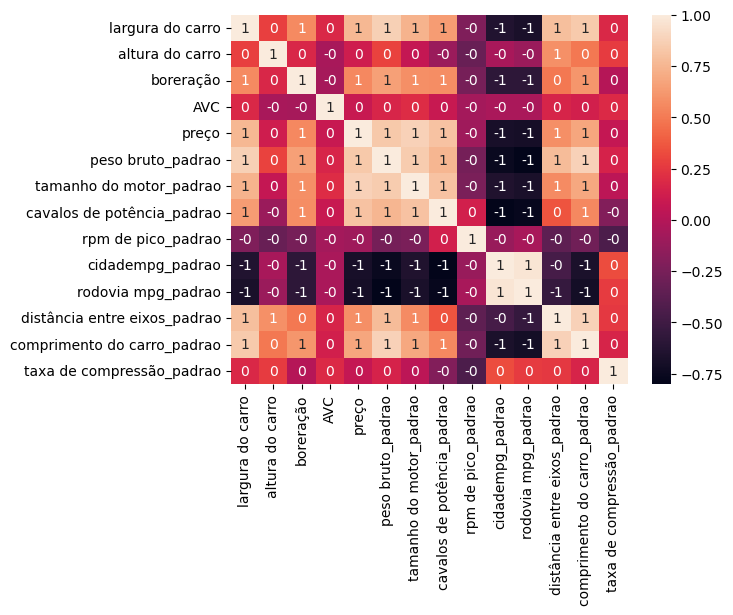

In [76]:
#Verificando a correlação de todas as colunas de valores com casas decimais
#Observa que as colunas de comprimento do carro, cavalos de potência, tamanho do motor, peso bruto e ...
#largura do carro, são colunas com alta correlação com a coluna de preço 
base3_colunasFloats = base3.select_dtypes(include=['float64'])
sns.heatmap(base3_colunasFloats.corr(), annot=True, fmt='.0f'); 

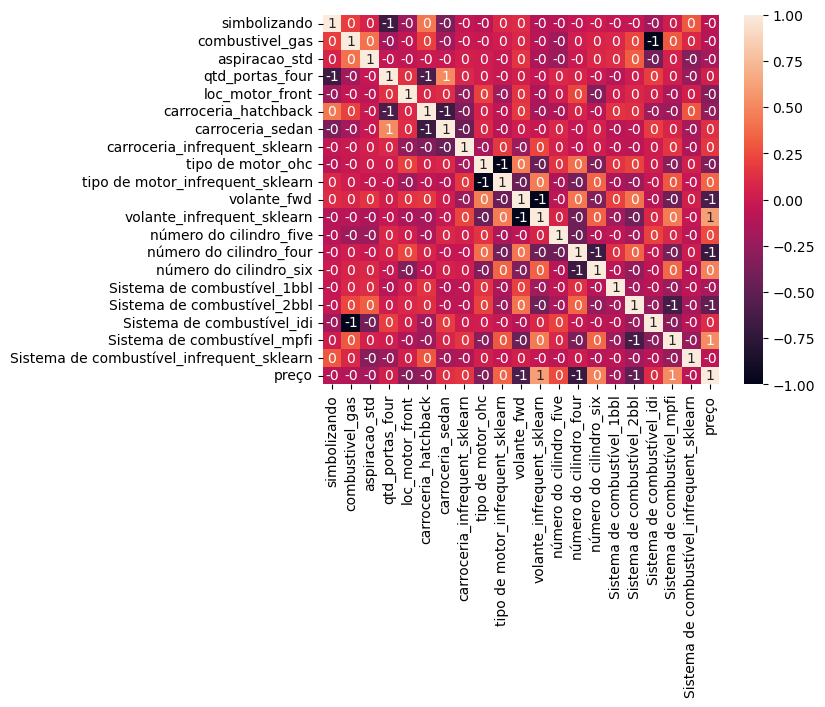

In [77]:
#Aqui é o gráfico de correlação entre as colunas de valores inteiros, colunas como ...
#sistema de combustível_mpfi, numero do cilindro_six e volante_infrequent_sklearn, tem alta correlação...
#com a coluna de preços.
base3_colunasint = base3.select_dtypes(include=['int64'])
base3_colunasint['preço'] = base3['preço'] #Aqui foi adicionando a coluna de preços a essa base pois ...
#ela é uma coluna com valores decimais, quando puxamos as colunas com valores inteiros, ela não veio.
sns.heatmap(base3_colunasint.corr(), annot=True, fmt='.0f'); 

## Conclusão:
<p><strong>Quais variáveis ​​são significativas na previsão do preço de um carro?</strong></p>
Os modelos criados mostraram um score relativamente alto para esses fatores -> <strong>tamanho do motor</strong>, <strong>cavalos de potência</strong>, <strong>peso bruto</strong>, <strong>largura do carro</strong> e <strong>comprimento do carro</strong>.
<p><strong>Quão bem essas variáveis ​​descrevem o preço de um carro?</strong></p>
No modelo criado para essas variáveis que mostraram alta correlação com a variável de preço, tivemos um <strong>score médio nos conjuntos de treino e teste de 80.5</strong>, os dados previstos se ajustaram bem nos valores reais. <strong>OBS</strong>: Depois da Feature Engineering, alguns fatores se mostraram como importantes para serem observados -> <strong>Sistema de Combustível_mpfi</strong>
e <strong>Carros com 6 Cilindros</strong> 